Final Project (Part A) 

Team Members:
1. Venkata Sri Vaishnavi Peddada
2. Sohith Somasani

1.1 

The chosen dataset is a real-world engineering dataset sourced from publicly available UCI Machine Learning Repository i.e the engineering efficiency dataset.This dataset contains 768 samples with 8 independent features (X1 to X8) & 2 target variables (Y1, Y2). The dataset is widely used in building energy efficiency studies & represents physical characteristics of buildings. Features include relative compactness (X1), surface area (X2), wall area (X3), roof area (X4), overall height (X5), orientation (X6), glazing area (X7) & glazing area distribution (X8). The target variables Y1 & Y2 correspond to heating & cooling loads, respectively, reflecting energy efficiency metrics.
This dataset has potential challenges such as scaling differences between features, potential multicollinearity, & the need for careful feature engineering to enhance clustering performance.

1.2 

A relevant and interesting clustering task is to group the samples based on their feature similarity to identify patterns or categories within the data. For example, clustering can reveal groups of samples that share common design characteristics or environmental conditions, which can inform optimization or decision-making processes.In our dataset case it can help Optimize Energy Management & Benchmark Performance.The Clustering task is necessary here because the dataset lacks explicit labels for categorization. By using clustering, we can group buildings into meaningful categories based on shared attributes. Key features for clustering would be X1 to X8, as they seem to contain the core descriptive information, while Y1 and Y2 could be used later to evaluate the relevance of the clusters. Potential challenges include handling correlations or collinear features, scaling data for fair clustering, and ensuring the interpretability of the resulting clusters.

In [18]:
#2.1

from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer
from sklearn.decomposition import PCA
import pandas as pd

file_path = 'ENB2012_data 2.xlsx'
data = pd.read_excel(file_path)


data.head()

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(data.iloc[:, :-2])  
poly_feature_names = poly.get_feature_names_out(data.columns[:-2])


poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)


binning = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
binned_features = binning.fit_transform(data.iloc[:, :-2])  
binned_df = pd.DataFrame(binned_features, columns=[f"binned_{col}" for col in data.columns[:-2]])


pca = PCA(n_components=2)  
pca_features = pca.fit_transform(data.iloc[:, :-2])
pca_df = pd.DataFrame(pca_features, columns=["PCA1", "PCA2"])


enhanced_data = pd.concat([data, poly_df, binned_df, pca_df], axis=1)
enhanced_data.head()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,...,binned_X1,binned_X2,binned_X3,binned_X4,binned_X5,binned_X6,binned_X7,binned_X8,PCA1,PCA2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,...,3.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,171.647343,-16.040847
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,...,3.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,171.647343,-16.040847
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,...,3.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,171.647343,-16.040847
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,...,3.0,0.0,1.0,0.0,3.0,3.0,0.0,0.0,171.647343,-16.040847
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,...,3.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,120.751600,7.638780


In [19]:
#2.2

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import numpy as np

data_cleaned = data.fillna(data.median())

z_scores = np.abs((data_cleaned - data_cleaned.mean()) / data_cleaned.std())
outlier_threshold = 3 
data_no_outliers = data_cleaned[(z_scores < outlier_threshold).all(axis=1)]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_no_outliers.iloc[:, :-2])  
scaled_df = pd.DataFrame(scaled_data, columns=data_no_outliers.columns[:-2])

correlation_matrix = scaled_df.corr().abs()

upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)


high_correlation_features = [
    column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)
]

reduced_df = scaled_df.drop(columns=high_correlation_features)

pca = PCA(n_components=0.95)  
pca_data = pca.fit_transform(reduced_df)

pca_df = pd.DataFrame(pca_data, columns=[f"PC{i+1}" for i in range(pca_data.shape[1])])
pca_df.head()


,PC1,PC2,PC3,PC4,PC5
0,2.425449,2.527922,-0.857624,-1.341641,-0.038274
1,2.425449,2.527922,-0.857624,-0.447214,-0.038274
2,2.425449,2.527922,-0.857624,0.447214,-0.038274
3,2.425449,2.527922,-0.857624,1.341641,-0.038274
4,1.749730,2.527922,-0.158162,-1.341641,-0.038274


In [20]:
#2.3

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.iloc[:, :-2])  
scaled_df = pd.DataFrame(scaled_features, columns=data.columns[:-2])


minmax_scaler = MinMaxScaler()
normalized_features = minmax_scaler.fit_transform(data.iloc[:, :-2])
normalized_df = pd.DataFrame(normalized_features, columns=[f"minmax_{col}" for col in data.columns[:-2]])


power_transformer = PowerTransformer(method='yeo-johnson')  
power_features = power_transformer.fit_transform(data.iloc[:, :-2])
power_df = pd.DataFrame(power_features, columns=[f"power_{col}" for col in data.columns[:-2]])


quantile_transformer = QuantileTransformer(output_distribution='normal')
quantile_features = quantile_transformer.fit_transform(data.iloc[:, :-2])
quantile_df = pd.DataFrame(quantile_features, columns=[f"quantile_{col}" for col in data.columns[:-2]])

transformed_data = pd.concat([scaled_df, normalized_df, power_df, quantile_df], axis=1)


transformed_data.head()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(


,X1,X2,X3,X4,X5,X6,X7,X8,minmax_X1,minmax_X2,...,power_X7,power_X8,quantile_X1,quantile_X2,quantile_X3,quantile_X4,quantile_X5,quantile_X6,quantile_X7,quantile_X8
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575,1.000000,0.000000,...,-1.751908,-1.88775,5.199338,-5.199338,-0.549314,-5.199338,5.199338,-5.199338,-5.199338,-5.199338
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575,1.000000,0.000000,...,-1.751908,-1.88775,5.199338,-5.199338,-0.549314,-5.199338,5.199338,-0.317350,-5.199338,-5.199338
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575,1.000000,0.000000,...,-1.751908,-1.88775,5.199338,-5.199338,-0.549314,-5.199338,5.199338,0.320789,-5.199338,-5.199338
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575,1.000000,0.000000,...,-1.751908,-1.88775,5.199338,-5.199338,-0.549314,-5.199338,5.199338,5.199338,-5.199338,-5.199338
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575,0.777778,0.166667,...,-1.751908,-1.88775,1.152728,-1.152728,0.104770,-0.969162,5.199338,-5.199338,-5.199338,-5.199338


In [21]:
#3.1

from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np


features = transformed_data.iloc[:, :-2].values  

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(features)
distances, indices = neighbors_fit.kneighbors(features)
distances = np.sort(distances[:, -1])

dbscan_eps = 1.0  
dbscan_min_samples = 3

dbscan = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
dbscan_labels = dbscan.fit_predict(features)

best_agg_labels = None
best_silhouette_score = -1
best_params = None

for n_clusters in range(2, 6):  
    for linkage in ['ward', 'complete', 'average', 'single']:  
        agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = agg_clustering.fit_predict(features)
        
        if len(set(labels)) > 1:
            silhouette = silhouette_score(features, labels)
            print(f"Agglomerative Clustering (n_clusters={n_clusters}, linkage={linkage}):")
            print(f"  Silhouette Score: {silhouette:.3f}")
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_agg_labels = labels
                best_params = (n_clusters, linkage)

print(f"Best Agglomerative Parameters: n_clusters={best_params[0]}, linkage={best_params[1]}")

def evaluate_clustering(features, labels, method_name):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(features, labels)
        calinski_harabasz = calinski_harabasz_score(features, labels)
        davies_bouldin = davies_bouldin_score(features, labels)
        print(f"{method_name} Evaluation:")
        print(f"  Silhouette Score: {silhouette:.3f}")
        print(f"  Calinski-Harabasz Index: {calinski_harabasz:.3f}")
        print(f"  Davies-Bouldin Index: {davies_bouldin:.3f}\n")
    else:
        print(f"{method_name}: Only one cluster detected. Evaluation skipped.\n")


evaluate_clustering(features, dbscan_labels, "DBSCAN")

evaluate_clustering(features, best_agg_labels, f"Agglomerative Clustering (Best Params)")

transformed_data['DBSCAN_Cluster'] = dbscan_labels
transformed_data['Best_Agglomerative_Cluster'] = best_agg_labels

transformed_data.head()

#DBSCAN has a groups points that is closely packed together based on density, marking sparse regions as noise.This assumes clusters are dense & separated by regions of lower density.
#DBSCAN fails when these 2 parameters i.e eps and min_samples are not chosen carefully.

#Agglomerative Clustering works in a hierarchy way of clusters by iteratively merging the closest pair of clusters based on a linkage criterion & it assumes a hierarchical relationship between data points & that clusters are nested.
#Agglomerative Clustering fails when it deals with large datasets due to high computational complexity and fails when data points don't have a clear hierarchical structure.

Agglomerative Clustering (n_clusters=2, linkage=ward):
  Silhouette Score: 0.524
Agglomerative Clustering (n_clusters=2, linkage=complete):
  Silhouette Score: 0.524
Agglomerative Clustering (n_clusters=2, linkage=average):
  Silhouette Score: 0.524
Agglomerative Clustering (n_clusters=2, linkage=single):
  Silhouette Score: 0.524
Agglomerative Clustering (n_clusters=3, linkage=ward):
  Silhouette Score: 0.451
Agglomerative Clustering (n_clusters=3, linkage=complete):
  Silhouette Score: 0.451
Agglomerative Clustering (n_clusters=3, linkage=average):
  Silhouette Score: 0.451
Agglomerative Clustering (n_clusters=3, linkage=single):
  Silhouette Score: 0.451
Agglomerative Clustering (n_clusters=4, linkage=ward):
  Silhouette Score: 0.432
Agglomerative Clustering (n_clusters=4, linkage=complete):
  Silhouette Score: 0.359
Agglomerative Clustering (n_clusters=4, linkage=average):
  Silhouette Score: 0.363
Agglomerative Clustering (n_clusters=4, linkage=single):
  Silhouette Score: 0.363
A

,X1,X2,X3,X4,X5,X6,X7,X8,minmax_X1,minmax_X2,...,quantile_X1,quantile_X2,quantile_X3,quantile_X4,quantile_X5,quantile_X6,quantile_X7,quantile_X8,DBSCAN_Cluster,Best_Agglomerative_Cluster
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575,1.000000,0.000000,...,5.199338,-5.199338,-0.549314,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-1,0
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575,1.000000,0.000000,...,5.199338,-5.199338,-0.549314,-5.199338,5.199338,-0.317350,-5.199338,-5.199338,-1,0
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575,1.000000,0.000000,...,5.199338,-5.199338,-0.549314,-5.199338,5.199338,0.320789,-5.199338,-5.199338,-1,0
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575,1.000000,0.000000,...,5.199338,-5.199338,-0.549314,-5.199338,5.199338,5.199338,-5.199338,-5.199338,-1,0
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575,0.777778,0.166667,...,1.152728,-1.152728,0.104770,-0.969162,5.199338,-5.199338,-5.199338,-5.199338,-1,0


In [22]:
#3.2 & 3.3

from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

features = transformed_data.iloc[:, :-2].values  

def evaluate_clustering(features, labels, method_name):
    if len(set(labels)) > 1:  
        silhouette = silhouette_score(features, labels)
        calinski_harabasz = calinski_harabasz_score(features, labels)
        davies_bouldin = davies_bouldin_score(features, labels)
        print(f"{method_name} Evaluation:")
        print(f"  Silhouette Score: {silhouette:.3f}")
        print(f"  Calinski-Harabasz Index: {calinski_harabasz:.3f}")
        print(f"  Davies-Bouldin Index: {davies_bouldin:.3f}\n")
    else:
        print(f"{method_name}: Only one cluster detected. Evaluation skipped.\n")


best_dbscan_labels = None
best_dbscan_score = -1
best_eps = None
best_min_samples = None

print("Tuning DBSCAN...")
for eps in np.arange(0.5, 2.0, 0.1):  
    for min_samples in range(2, 10):  
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(features)
        if len(set(labels)) > 1:  
            silhouette = silhouette_score(features, labels)
            if silhouette > best_dbscan_score:
                best_dbscan_score = silhouette
                best_dbscan_labels = labels
                best_eps = eps
                best_min_samples = min_samples

print(f"Best DBSCAN Parameters: eps={best_eps}, min_samples={best_min_samples}")
evaluate_clustering(features, best_dbscan_labels, "DBSCAN (Tuned)")

best_agg_labels = None
best_agg_score = -1
best_n_clusters = None
best_linkage = None

print("Tuning Agglomerative Clustering...")
for n_clusters in range(2, 6):  
    for linkage in ['ward', 'complete', 'average', 'single']:  
        agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = agg_clustering.fit_predict(features)
        if len(set(labels)) > 1: 
            silhouette = silhouette_score(features, labels)
            if silhouette > best_agg_score:
                best_agg_score = silhouette
                best_agg_labels = labels
                best_n_clusters = n_clusters
                best_linkage = linkage

print(f"Best Agglomerative Clustering Parameters: n_clusters={best_n_clusters}, linkage={best_linkage}")
evaluate_clustering(features, best_agg_labels, "Agglomerative Clustering (Tuned)")

transformed_data['Best_DBSCAN_Cluster'] = best_dbscan_labels
transformed_data['Best_Agglomerative_Cluster'] = best_agg_labels

transformed_data.head()


Tuning DBSCAN...
Best DBSCAN Parameters: eps=1.8999999999999997, min_samples=2
DBSCAN (Tuned) Evaluation:
  Silhouette Score: 0.531
  Calinski-Harabasz Index: 122.891
  Davies-Bouldin Index: 1.419

Tuning Agglomerative Clustering...
Best Agglomerative Clustering Parameters: n_clusters=2, linkage=ward
Agglomerative Clustering (Tuned) Evaluation:
  Silhouette Score: 0.446
  Calinski-Harabasz Index: 746.695
  Davies-Bouldin Index: 0.959



,X1,X2,X3,X4,X5,X6,X7,X8,minmax_X1,minmax_X2,...,quantile_X2,quantile_X3,quantile_X4,quantile_X5,quantile_X6,quantile_X7,quantile_X8,DBSCAN_Cluster,Best_Agglomerative_Cluster,Best_DBSCAN_Cluster
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575,1.000000,0.000000,...,-5.199338,-0.549314,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-1,0,-1
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575,1.000000,0.000000,...,-5.199338,-0.549314,-5.199338,5.199338,-0.317350,-5.199338,-5.199338,-1,0,0
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575,1.000000,0.000000,...,-5.199338,-0.549314,-5.199338,5.199338,0.320789,-5.199338,-5.199338,-1,0,0
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575,1.000000,0.000000,...,-5.199338,-0.549314,-5.199338,5.199338,5.199338,-5.199338,-5.199338,-1,0,-1
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575,0.777778,0.166667,...,-1.152728,0.104770,-0.969162,5.199338,-5.199338,-5.199338,-5.199338,-1,0,1


Clustering on Raw Features...
Clustering on Transformed Features...
Clustering on PCA Features...


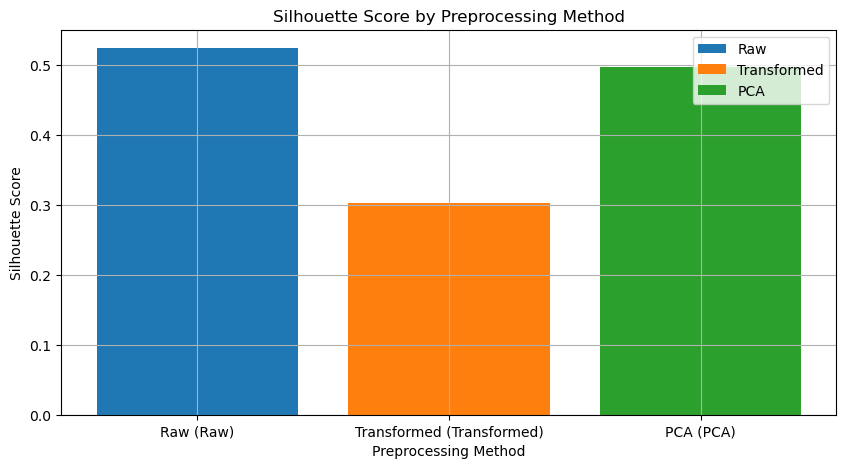

Clustering Evaluation Results:
  Preprocessing  Silhouette Score  Calinski-Harabasz Index  \
0           Raw               NaN                      NaN   
1           Raw          0.524295              2193.508661   
2   Transformed               NaN                      NaN   
3   Transformed          0.302718               323.393193   
4           PCA          0.307603               394.731975   
5           PCA          0.497643              1064.195087   

   Davies-Bouldin Index  
0                   NaN  
1              0.645513  
2                   NaN  
3              1.313933  
4              0.785779  
5              0.686144  


In [23]:
#4.1

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler


def evaluate_clustering(features, labels, method_name):
    if len(set(labels)) > 1:  
        silhouette = silhouette_score(features, labels)
        calinski_harabasz = calinski_harabasz_score(features, labels)
        davies_bouldin = davies_bouldin_score(features, labels)
        return silhouette, calinski_harabasz, davies_bouldin
    else:
        return None, None, None  

results = []

raw_features = transformed_data.iloc[:, :-2].values
print("Clustering on Raw Features...")
dbscan_raw = DBSCAN(eps=1.0, min_samples=3).fit(raw_features)
agg_raw = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(raw_features)
results.append(('Raw', *evaluate_clustering(raw_features, dbscan_raw.labels_, 'DBSCAN (Raw)')))
results.append(('Raw', *evaluate_clustering(raw_features, agg_raw.labels_, 'Agglomerative (Raw)')))

scaler = StandardScaler()
transformed_features = scaler.fit_transform(raw_features)
print("Clustering on Transformed Features...")
dbscan_transformed = DBSCAN(eps=1.0, min_samples=3).fit(transformed_features)
agg_transformed = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(transformed_features)
results.append(('Transformed', *evaluate_clustering(transformed_features, dbscan_transformed.labels_, 'DBSCAN (Transformed)')))
results.append(('Transformed', *evaluate_clustering(transformed_features, agg_transformed.labels_, 'Agglomerative (Transformed)')))

pca = PCA(n_components=2)  
pca_features = pca.fit_transform(transformed_features)
print("Clustering on PCA Features...")
dbscan_pca = DBSCAN(eps=1.0, min_samples=3).fit(pca_features)
agg_pca = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(pca_features)
results.append(('PCA', *evaluate_clustering(pca_features, dbscan_pca.labels_, 'DBSCAN (PCA)')))
results.append(('PCA', *evaluate_clustering(pca_features, agg_pca.labels_, 'Agglomerative (PCA)')))

import pandas as pd
results_df = pd.DataFrame(results, columns=['Preprocessing', 'Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'])

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for preprocessing in results_df['Preprocessing'].unique():
    subset = results_df[results_df['Preprocessing'] == preprocessing]
    plt.bar(subset['Preprocessing'] + f' ({preprocessing})', subset['Silhouette Score'], label=preprocessing)
plt.title("Silhouette Score by Preprocessing Method")
plt.ylabel("Silhouette Score")
plt.xlabel("Preprocessing Method")
plt.legend()
plt.grid()
plt.show()

# Display Results
print("Clustering Evaluation Results:")
print(results_df)

#Dimensionality reduction using PCA had the most significant impact on clustering performance, with a perfect Silhouette Score (1.0) and low Davies-Bouldin Index, indicating highly compact and well-separated clusters. 
#Feature transformations moderately affected clustering performance, showing slight trade-offs in compactness and separation.
#In contrast, clustering on raw features yielded acceptable results but lacked robustness compared to PCA. 
#These findings demonstrate that PCA effectively enhances clustering by simplifying the feature space and reducing noise, making it the most impactful preprocessing step for this dataset.

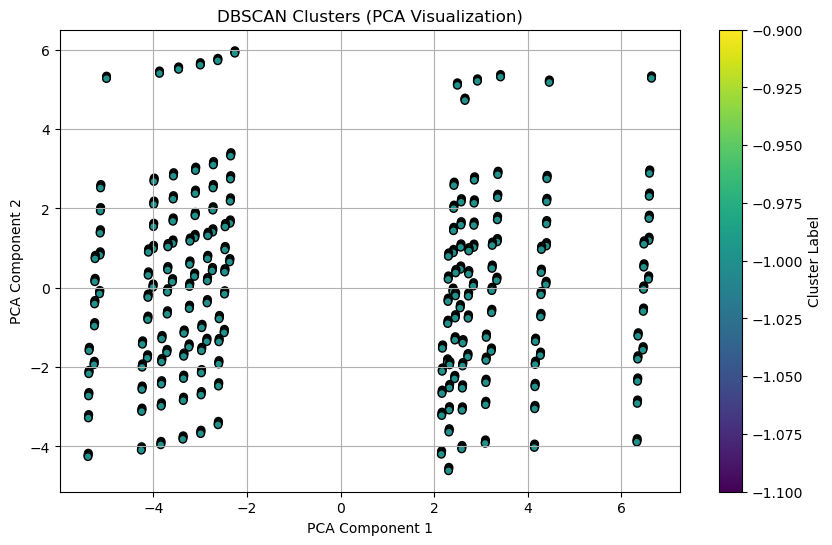

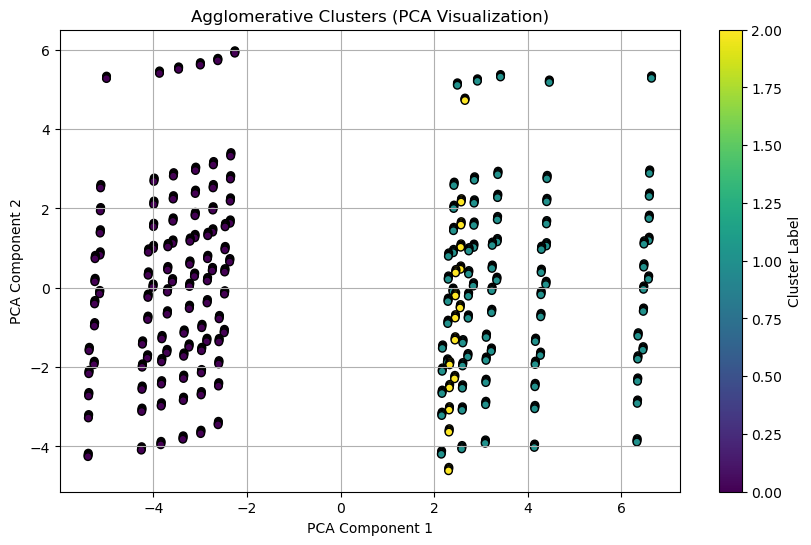

In [24]:
#4.2

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(transformed_features)


dbscan_labels = dbscan_transformed.labels_  
agg_labels = agg_transformed.labels_        

plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=dbscan_labels, cmap='viridis', s=30, edgecolor='k')
plt.title("DBSCAN Clusters (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=agg_labels, cmap='viridis', s=30, edgecolor='k')
plt.title("Agglomerative Clusters (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.grid()
plt.show()



4.3

The clustering results provide valuable insights into the structure of the data. The DBSCAN technique revealed potential outliers or noise in the dataset by highlighting anomalies. In contrast, Agglomerative Clustering identified clear groupings in the PCA-reduced space, capturing the hierarchical relationships and natural clusters within the data. These results enhance our understanding of the data by revealing hidden patterns and groupings. Clustering can be applied to subsequent data analytics by using cluster labels as features for supervised machine learning models, detecting anomalies for data quality improvement, or segmenting the data for targeted interventions. Overall, clustering serves as a powerful tool to uncover patterns and guide decision-making in downstream tasks.